In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import seaborn as sns

# 1. Preprocessing

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
IDtest = test["PassengerId"]

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
dataset = pd.concat([train, test])

In [5]:
dataset.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [6]:
dataset = dataset.fillna(np.nan)

# a. Name to title

In [7]:
# Get Title from Name
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in dataset["Name"]]
dataset["Title"] = pd.Series(dataset_title)

In [8]:
#title_set = set(dataset_title)
#title_dict = dict.fromkeys(title_set, 0)
title_dict = {'Capt': 0,
 'Col': 1,
 'Don': 2,
 'Dona': 3,
 'Dr': 4,
 'Jonkheer': 5,
 'Lady': 6,
 'Major': 7,
 'Master': 8,
 'Miss': 9,
 'Mlle': 10,
 'Mme': 11,
 'Mr': 12,
 'Mrs': 13,
 'Ms': 14,
 'Rev': 15,
 'Sir': 16,
 'the Countess': 17}

In [9]:
dataset["Title_value"] = dataset["Title"].map(title_dict)

In [10]:
dataset

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Title_value
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,12
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,13
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,9
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,13
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,12
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,Mr,12
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,Mr,12
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,Master,8
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,Mrs,13
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,Mrs,13


In [11]:
dataset.isna().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Title             0
Title_value       0
dtype: int64

# b. fill the na for Fare

In [12]:
dataset["Fare"] = dataset["Fare"].fillna(dataset["Fare"].median())

In [13]:
dataset.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Title             0
Title_value       0
dtype: int64

# c. Fill the na for Embarked

In [14]:
dataset["Embarked"].describe()

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

In [15]:
# Fill Embarked nan values of dataset set with 'S' most frequent value
dataset["Embarked"] = dataset["Embarked"].fillna("S")

In [16]:
dataset.isna().sum()

Age             263
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Title             0
Title_value       0
dtype: int64

# d. Fill the na for Age

In [17]:
dataset["Age"] = dataset["Age"].fillna(dataset["Age"].mean())
dataset.isna().sum()

Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Title             0
Title_value       0
dtype: int64

# Feature engineering

In [18]:
# Create a family size descriptor from SibSp and Parch
dataset["Fsize"] = dataset["SibSp"] + dataset["Parch"] + 1

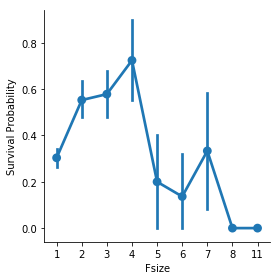

In [19]:
g = sns.factorplot(x="Fsize",y="Survived",data = dataset)
g = g.set_ylabels("Survival Probability")

In [20]:
dataset

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Title_value,Fsize
0,22.000000,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,12,2
1,38.000000,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,13,2
2,26.000000,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,9,1
3,35.000000,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,13,2
4,35.000000,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,12,1
5,29.881138,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,Mr,12,1
6,54.000000,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,Mr,12,1
7,2.000000,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,Master,8,5
8,27.000000,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,Mrs,13,3
9,14.000000,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,Mrs,13,2


In [21]:
#title_set = set(dataset["Sex"])
#title_dict = dict.fromkeys(title_set, 0)
sex_dict = {'female': 0, 'male': 1}
dataset["Sex_value"] = dataset["Sex"].map(sex_dict)

In [22]:
# convert to indicator values Sex and Embarked 
#dataset = pd.get_dummies(dataset, columns = ["Sex"])
#dataset = pd.get_dummies(dataset, columns = ["Embarked"])
#dataset

In [23]:
# Replace the Cabin number by the type of cabin 'X' if not
dataset["Cabin_prefix"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in dataset['Cabin'] ])

In [24]:
#title_set = set(dataset["Cabin_prefix"])
#title_dict = dict.fromkeys(title_set, 0)
cabin_dict = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7, 'X': 8}
dataset["Cabin_value"] = dataset["Cabin_prefix"].map(cabin_dict)

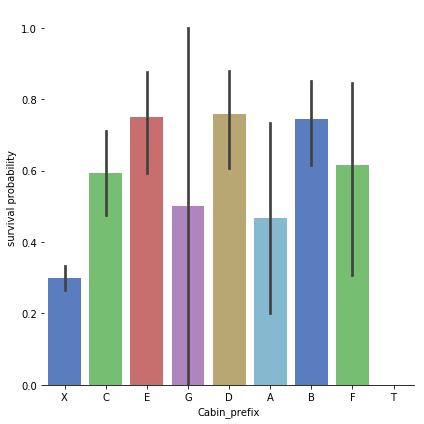

In [25]:
g = sns.factorplot(x="Cabin_prefix",y="Survived",data=dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

In [26]:
dataset.isna().sum()

Age                0
Cabin           1014
Embarked           0
Fare               0
Name               0
Parch              0
PassengerId        0
Pclass             0
Sex                0
SibSp              0
Survived         418
Ticket             0
Title              0
Title_value        0
Fsize              0
Sex_value          0
Cabin_prefix       0
Cabin_value        0
dtype: int64

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 18 columns):
Age             1309 non-null float64
Cabin           295 non-null object
Embarked        1309 non-null object
Fare            1309 non-null float64
Name            1309 non-null object
Parch           1309 non-null int64
PassengerId     1309 non-null int64
Pclass          1309 non-null int64
Sex             1309 non-null object
SibSp           1309 non-null int64
Survived        891 non-null float64
Ticket          1309 non-null object
Title           1309 non-null object
Title_value     1309 non-null int64
Fsize           1309 non-null int64
Sex_value       1309 non-null int64
Cabin_prefix    1309 non-null object
Cabin_value     1309 non-null int64
dtypes: float64(3), int64(8), object(7)
memory usage: 234.3+ KB


In [28]:
dataset

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Title_value,Fsize,Sex_value,Cabin_prefix,Cabin_value
0,22.000000,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,12,2,1,X,8
1,38.000000,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,13,2,0,C,2
2,26.000000,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,9,1,0,X,8
3,35.000000,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,13,2,0,C,2
4,35.000000,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,12,1,1,X,8
5,29.881138,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,Mr,12,1,1,X,8
6,54.000000,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,Mr,12,1,1,E,4
7,2.000000,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,Master,8,5,1,X,8
8,27.000000,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,Mrs,13,3,0,X,8
9,14.000000,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,Mrs,13,2,0,X,8


# Model

In [29]:
# drop useless features
dataset.drop(labels=["PassengerId","Cabin","Embarked","Name","Sex","Ticket","Title", "Cabin_prefix", "Parch", "SibSp"], axis = 1,inplace=True)

In [30]:
dataset

,Age,Fare,Pclass,Survived,Title_value,Fsize,Sex_value,Cabin_value
0,22.000000,7.2500,3,0.0,12,2,1,8
1,38.000000,71.2833,1,1.0,13,2,0,2
2,26.000000,7.9250,3,1.0,9,1,0,8
3,35.000000,53.1000,1,1.0,13,2,0,2
4,35.000000,8.0500,3,0.0,12,1,1,8
5,29.881138,8.4583,3,0.0,12,1,1,8
6,54.000000,51.8625,1,0.0,12,1,1,4
7,2.000000,21.0750,3,0.0,8,5,1,8
8,27.000000,11.1333,3,1.0,13,3,0,8
9,14.000000,30.0708,2,1.0,13,2,0,8


In [31]:
## Separate train dataset and test dataset
train_len = len(train)
train = dataset[:train_len]
test = dataset[train_len:]
test.drop(labels=["Survived"],axis = 1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [32]:
train.describe()

,Age,Fare,Pclass,Survived,Title_value,Fsize,Sex_value,Cabin_value
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.735277,32.204208,2.308642,0.383838,11.236813,1.904602,0.647587,6.716049
std,13.002218,49.693429,0.836071,0.486592,1.854552,1.613459,0.477990,2.460739
min,0.420000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,22.000000,7.910400,2.000000,0.000000,9.000000,1.000000,0.000000,8.000000
50%,29.881138,14.454200,3.000000,0.000000,12.000000,1.000000,1.000000,8.000000
75%,35.000000,31.000000,3.000000,1.000000,12.000000,2.000000,1.000000,8.000000
max,80.000000,512.329200,3.000000,1.000000,17.000000,11.000000,1.000000,8.000000


In [33]:
test.describe()

,Age,Fare,Pclass,Title_value,Fsize,Sex_value,Cabin_value
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.00000
mean,30.192052,35.576535,2.265550,11.131579,1.839713,0.636364,6.80622
std,12.635527,55.850103,0.841838,1.792446,1.519072,0.481622,2.36851
min,0.170000,0.000000,1.000000,2.000000,1.000000,0.000000,0.00000
25%,23.000000,7.895800,1.000000,9.000000,1.000000,0.000000,8.00000
50%,29.881138,14.454200,3.000000,12.000000,1.000000,1.000000,8.00000
75%,35.750000,31.471875,3.000000,12.000000,2.000000,1.000000,8.00000
max,76.000000,512.329200,3.000000,15.000000,11.000000,1.000000,8.00000


In [34]:
## Separate train features and label 
train["Survived"] = train["Survived"].astype(int)

y_train = train["Survived"]

x_train = train.drop(labels = ["Survived"],axis = 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [63]:
def predict_and_flush(classifier, flush_file_name):
    result = classifier.predict(test)
    test_Survived = pd.Series(result, name="Survived")
    results = pd.concat([IDtest,test_Survived],axis=1)
    results.to_csv(flush_file_name,index=False)

In [36]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5)

In [38]:
rfc = RandomForestClassifier(n_estimators=100)

In [40]:
cv_result = cross_val_score(rfc, x_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4)

In [41]:
cv_result.mean()

0.8115607313602056

In [ ]:
#rfc.fit(x_train, y_train)
#result = rfc.predict(test)

In [57]:
# Search grid for optimal parameters
rfc = RandomForestClassifier()
rf_param_grid = {"max_depth": [1, 3, 5, 7, 10],
              "max_features": [1, 3, 5, 7],
              "min_samples_split": [2, 3, 6, 10],
              "min_samples_leaf": [1, 3, 6, 10],
              "bootstrap": [False],
              "n_estimators" :[50, 100, 150, 200, 300],
              "criterion": ["gini"]}


gsrfc = GridSearchCV(rfc,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 12, verbose = 1)

gsrfc.fit(x_train,y_train)

rfc_best = gsrfc.best_estimator_
print(rfc_best)
print(gsrfc.best_score_)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    7.9s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:   10.7s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:   15.4s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:   22.0s
[Parallel(n_jobs=12)]: Done 1226 tasks      | elapsed:   30.6s
[Parallel(n_jobs=12)]: Done 1776 tasks      | elapsed:   42.1s
[Parallel(n_jobs=12)]: Done 2426 tasks      | elapsed:   56.1s
[Parallel(n_jobs=12)]: Done 3176 tasks      | elapsed:  1.2min
[Parallel(n_jobs=12)]: Done 4026 tasks      | elapsed:  1.6min
[Parallel(n_jobs=12)]: Done 4976 tasks      | elapsed:  2.0min
[Parallel(n_jobs=12)]: Done 6026 tasks      | elapsed:  2.4min
[Parallel(n_jobs=12)]: Done 7176 tasks      | elapsed:  2.9min
[Parallel(n_jobs=12)]: Done 8000 out of 8000 | elapsed:  3.3min finished


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=10, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.8406285072951739


In [67]:
# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2,3,5,7,20,30,50,100,150,200],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.7, 1, 1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 8, verbose = 1)

gsadaDTC.fit(x_train,y_train)

ada_best  = gsadaDTC.best_estimator_
print(ada_best)
print(gsadaDTC.best_score_)

Fitting 5 folds for each of 792 candidates, totalling 3960 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    5.1s
[Parallel(n_jobs=8)]: Done 886 tasks      | elapsed:   16.9s
[Parallel(n_jobs=8)]: Done 1879 tasks      | elapsed:   32.1s
[Parallel(n_jobs=8)]: Done 2929 tasks      | elapsed:   47.0s


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random'),
          learning_rate=0.3, n_estimators=20, random_state=7)
0.8159371492704826


[Parallel(n_jobs=8)]: Done 3960 out of 3960 | elapsed:  1.1min finished


In [66]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 2, 3, 3, 4, 5, 7],
              "min_samples_split": [2, 3, 5, 7],
              "min_samples_leaf": [1, 3, 5, 7],
              "bootstrap": [False],
              "n_estimators" :[50,100,150,200,250,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 8, verbose = 1)

gsExtC.fit(x_train,y_train)

ext_best = gsExtC.best_estimator_

print(ext_best)
print(gsExtC.best_score_)

Fitting 5 folds for each of 672 candidates, totalling 3360 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   10.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   16.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:   25.5s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:   37.7s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:   52.7s
[Parallel(n_jobs=8)]: Done 2434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done 3184 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done 3360 out of 3360 | elapsed:  1.6min finished


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features=4, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=7,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
0.8462401795735129


In [68]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [50,100,150,200,300],
              'learning_rate': [0.2,0.1,0.08, 0.05, 0.01],
              'max_depth': [2,3,4,6, 8],
              'min_samples_leaf': [5,10,20,40,50,100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 8, verbose = 1)

gsGBC.fit(x_train,y_train)
gb_best = gsGBC.best_estimator_

print(gb_best)
print(gsGBC.best_score_)

Fitting 5 folds for each of 1750 candidates, totalling 8750 fits


[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done 1264 tasks      | elapsed:   22.1s
[Parallel(n_jobs=4)]: Done 3264 tasks      | elapsed:   55.6s
[Parallel(n_jobs=4)]: Done 6064 tasks      | elapsed:  1.6min


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=8,
              max_features=0.3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=40, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
0.8484848484848485


[Parallel(n_jobs=4)]: Done 8750 out of 8750 | elapsed:  2.4min finished


In [69]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 8, verbose = 1)

gsSVMC.fit(x_train,y_train)

svc_best = gsSVMC.best_estimator_

print(svc_best)
print(gsSVMC.best_score_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=4)]: Done  49 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done 133 out of 140 | elapsed:    9.9s remaining:    0.4s
[Parallel(n_jobs=4)]: Done 140 out of 140 | elapsed:   10.2s finished


SVC(C=200, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.792368125701459


# Ensemble modeling

In [70]:
votingC = VotingClassifier(estimators=[('rfc', rfc_best), ('extc', ext_best),
('svc', svc_best), ('adac',ada_best),('gb',gb_best)], voting='soft', n_jobs=8)

votingC = votingC.fit(x_train, y_train)

# Prediction

In [71]:
#predict_and_flush(gsrfc, "gsrfc.csv")
predict_and_flush(votingC, "voting.csv")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
